In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def read_file(path):
    return pd.read_excel(path)

In [3]:
#q_path = 'FGUK_sentiment.xlsx'
q_path = 'FGUKv2_azure_sentiment.xlsx'
df = read_file(q_path)
df = df[df['tags'].notna()]
df.head()

,Unnamed: 0,comment ID,Getting around,Living villages,Bushland lifestyle,sentence,tags,Sentiment,Azure Sentiment
0,0,1,0,1,0,concerned parking problem already complained p...,Living villages,Positive,negative
1,1,1,1,0,0,strongly plan building 5 storeys units denman ...,Getting around,Positive,negative
2,2,2,0,0,1,believe number issues need addressed developme...,Bushland lifestyle,Positive,mixed
3,3,2,0,1,0,ecosystem services value associated waterway c...,Living villages,Positive,negative
4,4,2,1,0,0,2 identified within footprint although local p...,Getting around,Positive,neutral


In [4]:
df.shape

(1879, 9)

In [5]:
df['Sentiment2'] = df['Sentiment'].apply(lambda x: 1 if x == 'Positive' else 0)
df['Azure'] = df['Azure Sentiment']
#df.head()

In [6]:
#colors = ['blue', 'lightcoral']
#colors = ['darkblue', 'lightcoral', 'violet',  'cyan']
#colors = ['lightseagreen', 'lightcoral', 'deepskyblue',  'turquoise']
#colors = ['turquoise', 'lightcoral', 'deepskyblue',  'lightyellow']
colors = ['turquoise', 'lightseagreen', 'aquamarine',  'c']
list_of_col = df.tags.unique()
list_of_col

array([' Living villages', ' Getting around', ' Bushland lifestyle'],
      dtype=object)

In [7]:
def plot(c):
    temp = df[df.tags == c]
    
    cnt = dict(temp.Azure.value_counts())
    sizes = list(cnt.values())
    labels = cnt.keys()

    plt.pie(sizes, labels=labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=90, radius=1.8 * 1000)

    plt.axis('equal')
    plt.title(c, fontsize=18, loc='left')
    plt.savefig('img2/'+c+'.png')
    plt.show()

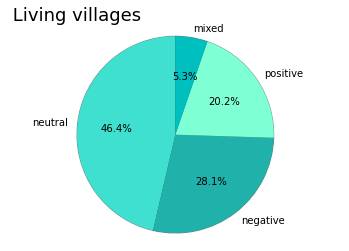

In [8]:
#Living villages
fig1= plot(' Living villages')

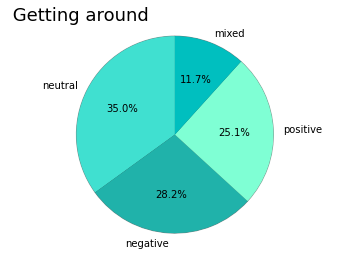

In [9]:
#Getting around
fig2= plot(' Getting around')

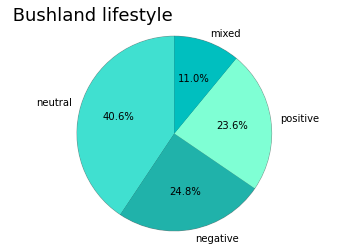

In [10]:
#Bushland lifestyle
fig3= plot(' Bushland lifestyle')

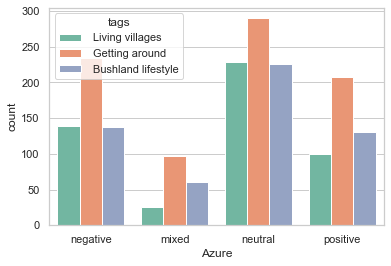

In [13]:
#sns.set(style="darkgrid")
sns.set(style="whitegrid")
ax = sns.countplot(x="Azure", hue="tags", data=df, palette = "Set2")
#ax.savefig('img2/Sentimentchart1.png')

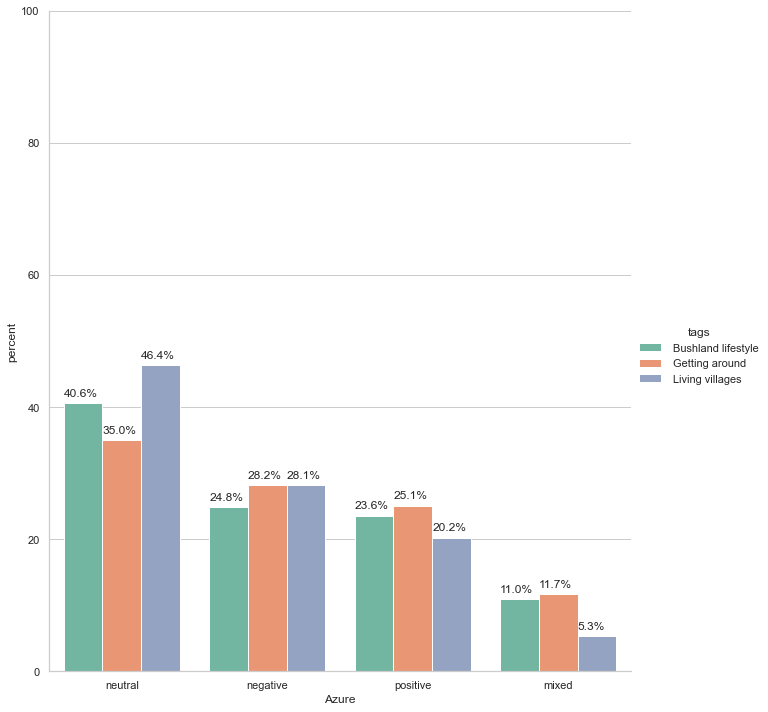

In [12]:
x,y = 'Azure', 'tags'

df1 = df.groupby(y)[x].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1, palette = "Set2", height=10, aspect=.9)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y+1,txt)

g.savefig('img2/barchart.png')